<center><h1> Iris Flower Classification </h1></center>


## Import Libraries

In [1]:
#import libraries
!pip install kneed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.cluster.hierarchy import linkage,dendrogram
import plotly.express as px
from sklearn.svm import SVC
import plotly.graph_objs as go
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

#warnings
import warnings
warnings.simplefilter(action='ignore')


## Data Preprocesssing

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/iris-flower-dataset/IRIS.csv


In [3]:
#Load data
from sklearn import datasets
iris = pd.read_csv("../input/iris-flower-dataset/IRIS.csv")

x = iris.iloc[:, [0, 1, 2, 3]].values

In [4]:
iris.head().style.background_gradient(cmap =sns.cubehelix_palette(as_cmap=True))

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.100000,3.500000,1.400000,0.200000,Iris-setosa
1,4.900000,3.000000,1.400000,0.200000,Iris-setosa
2,4.700000,3.200000,1.300000,0.200000,Iris-setosa
3,4.600000,3.100000,1.500000,0.200000,Iris-setosa
4,5.000000,3.600000,1.400000,0.200000,Iris-setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# checking the simple statistical parameters 

iris.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [7]:
X = iris.iloc[:,:-1].values #Set our training data

y = iris.iloc[:,-1].values #We'll use this just for visualization as clustering doesn't require labels

<a id="3"></a>
## Exploratory Data Analysis

In [8]:
# checking the number of rows and columns in train dataset
rows,col=x.shape
print ('Row:' , rows,'\nColumns:',col)

Row: 150 
Columns: 4


In [9]:
#number of null values 
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
#To check number of uniqe elements in each columns.
iris.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [11]:
fig = px.scatter(data_frame=iris, x='sepal_length',color='species')
fig.update_layout(width=800, height=600,
                  xaxis=dict(title='sepallength',color="#BF40BF"),
                 yaxis=dict(title="Flower Name",color="#BF40BF"))
fig.show()

In [12]:
fig = px.scatter(data_frame=iris, x='sepal_width',color='species')
fig.update_layout(width=800, height=600,
                  xaxis=dict(title='sepalwidth',color="#BF40BF"),
                 yaxis=dict(title="Flower Name",color="#BF40BF"))
fig.show()

In [13]:
fig = px.scatter(data_frame=iris, x='petal_length',color='species')
fig.update_layout(width=800, height=600,
                  xaxis=dict(title='petallength',color="#BF40BF"),
                 yaxis=dict(title="Flower Name",color="#BF40BF"))
fig.show()

In [14]:
fig = px.scatter(data_frame=iris, x='petal_width',color='species')
fig.update_layout(width=800, height=600,
                  xaxis=dict(title='petalwidth',color="#BF40BF"),
                 yaxis=dict(title="Flower Name",color="#BF40BF"))
fig.show()

## K-Means Clustering

In [15]:
kmeans_set={"init":"random","n_init":10,"max_iter":300,"random_state":42}

In [16]:
scaler= StandardScaler()
scaled_features= scaler.fit_transform(x)

In [17]:

List=[]
for k in range(1,20):
    kmeans= KMeans(n_clusters=k, **kmeans_set) #** open dictionry
    kmeans.fit(scaled_features)
    List.append(kmeans.inertia_)

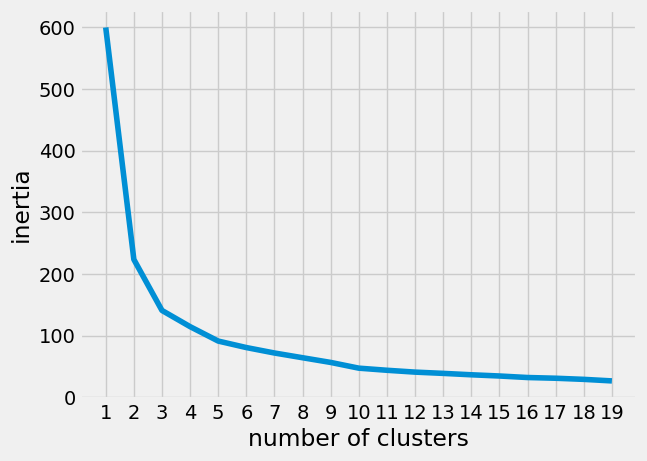

In [18]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,20),List)
plt.xticks(range(1,20))
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

In [19]:
from kneed import KneeLocator
k1=KneeLocator(range(1,20),List , curve='convex', direction= 'decreasing')
k1.elbow

3

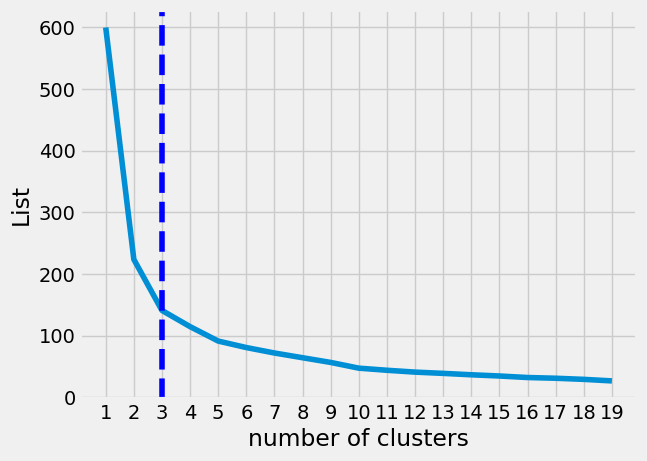

In [20]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,20),List)
plt.xticks(range(1,20))
plt.xlabel('number of clusters')
plt.ylabel('List')
plt.axvline(x=k1.elbow, color='b', label= 'axvline-full height', ls= '--')
plt.show()

In [21]:
silhouette_coefficients =[]
for k in range(2,20):#1 is the worse
    kmeans=KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(scaled_features)
    score= silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

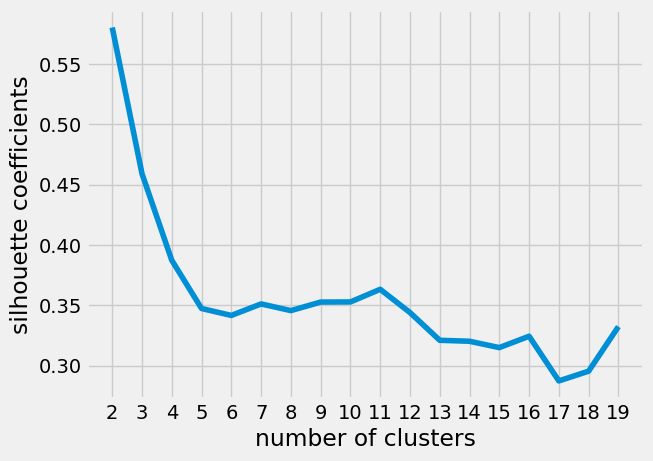

In [22]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,20),silhouette_coefficients)
plt.xticks(range(2,20))
plt.xlabel('number of clusters')
plt.ylabel('silhouette coefficients')
plt.show()

In [23]:
kmeans= KMeans(n_clusters=3, **kmeans_set)
y_kmeans= kmeans.fit_predict(x)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


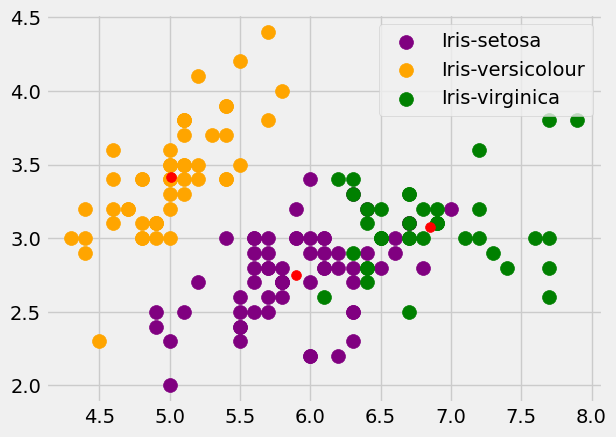

In [24]:

centroids= kmeans.cluster_centers_
print(centroids)
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
#plotting the centroid of the clusters
plt.scatter(centroids[:,0], centroids[:,1],c='red', s=50)
plt.legend()
plt.show()

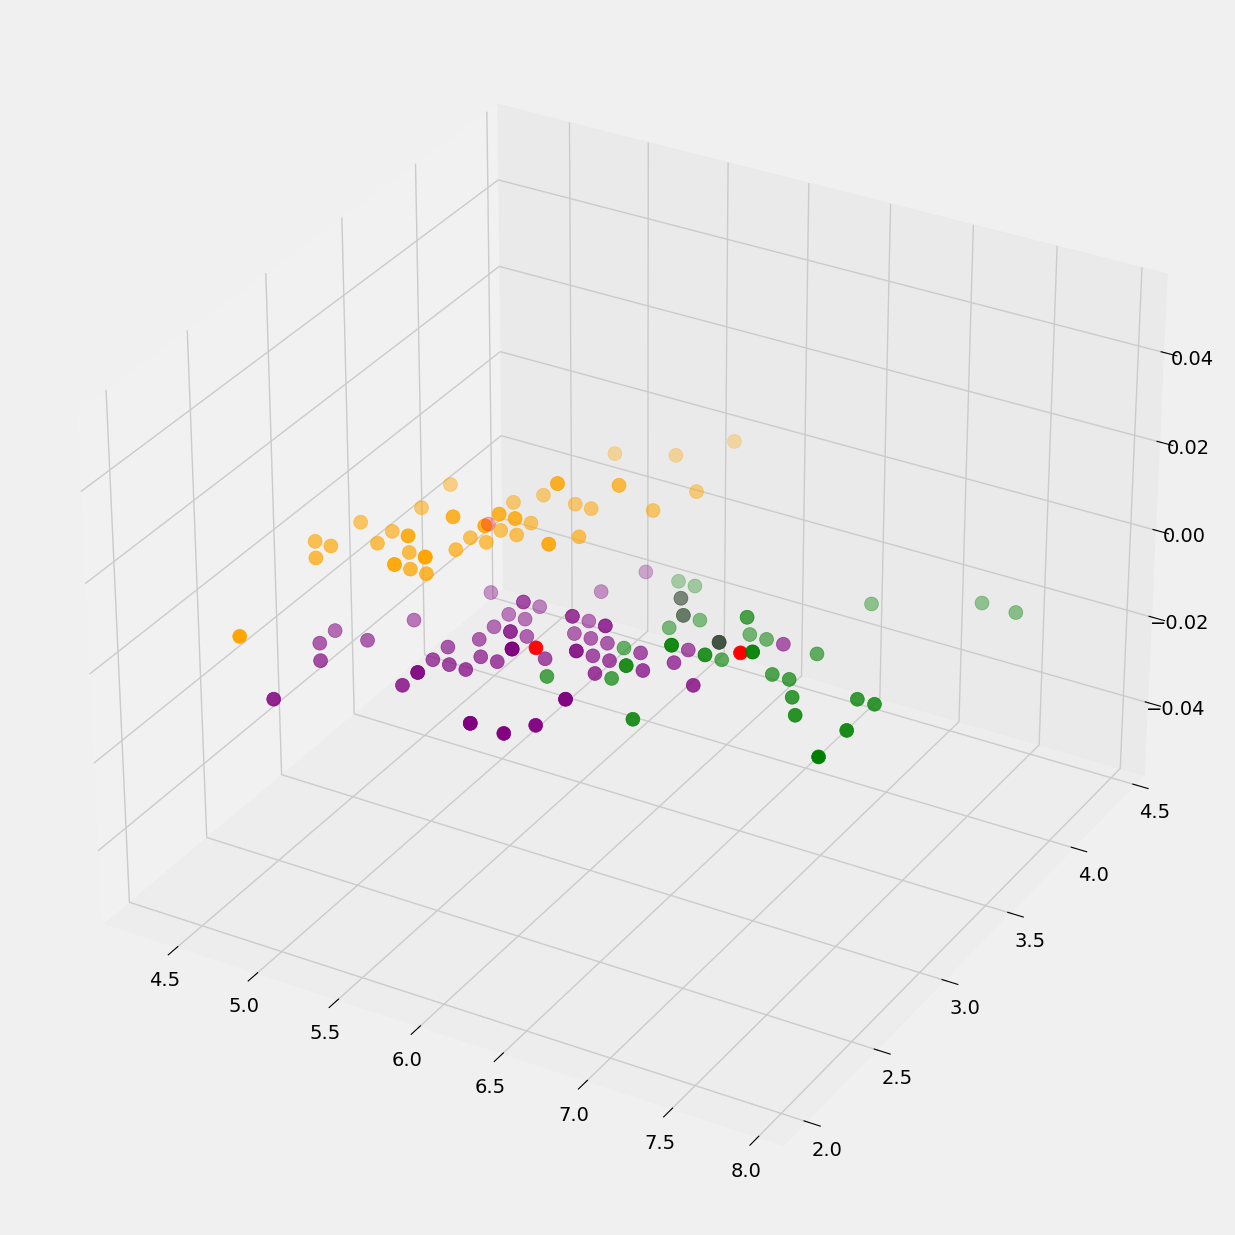

In [25]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()

In [26]:
kmeans= KMeans(n_clusters=3, **kmeans_set).fit(x)

In [27]:
cluster=kmeans.labels_

In [28]:
cluster  #our tag values are between 0-2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [29]:
#let's divide our data into groups
iris["cluster_no"]=cluster
iris.head(12)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster_no
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
5,5.4,3.9,1.7,0.4,Iris-setosa,1
6,4.6,3.4,1.4,0.3,Iris-setosa,1
7,5.0,3.4,1.5,0.2,Iris-setosa,1
8,4.4,2.9,1.4,0.2,Iris-setosa,1
9,4.9,3.1,1.5,0.1,Iris-setosa,1


In [30]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster_no
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2
149,5.9,3.0,5.1,1.8,Iris-virginica,0


In [31]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1],
    mode='markers',marker_color='#DB4CB2',name='Iris-setosa'
))

fig.add_trace(go.Scatter(
    x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1],
    mode='markers',marker_color='#c9e9f6',name='Iris-versicolour'
))

fig.add_trace(go.Scatter(
    x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1],
    mode='markers',marker_color='#7D3AC1',name='Iris-virginica'
))

fig.add_trace(go.Scatter(
    x=centroids[:, 0], y=centroids[:,1],
    mode='markers',marker_color='#CAC9CD',marker_symbol=4,marker_size=13,name='Centroids'
))
fig.update_layout(template='plotly_dark',width=1000, height=500,)

## Hierarchical Cluster

In [32]:
import scipy.cluster.hierarchy as sch

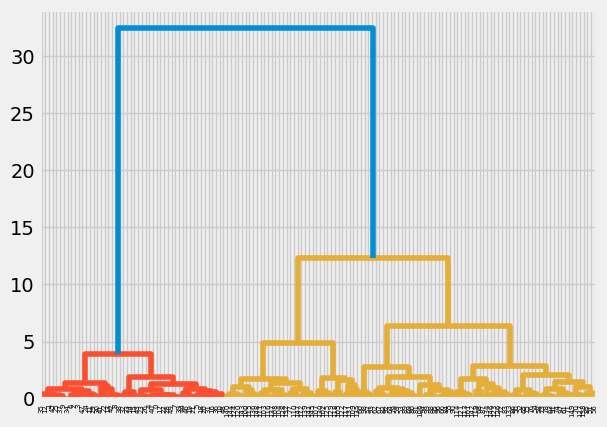

In [33]:
dendogram=sch.dendrogram(sch.linkage(x,method="ward"))
plt.show()

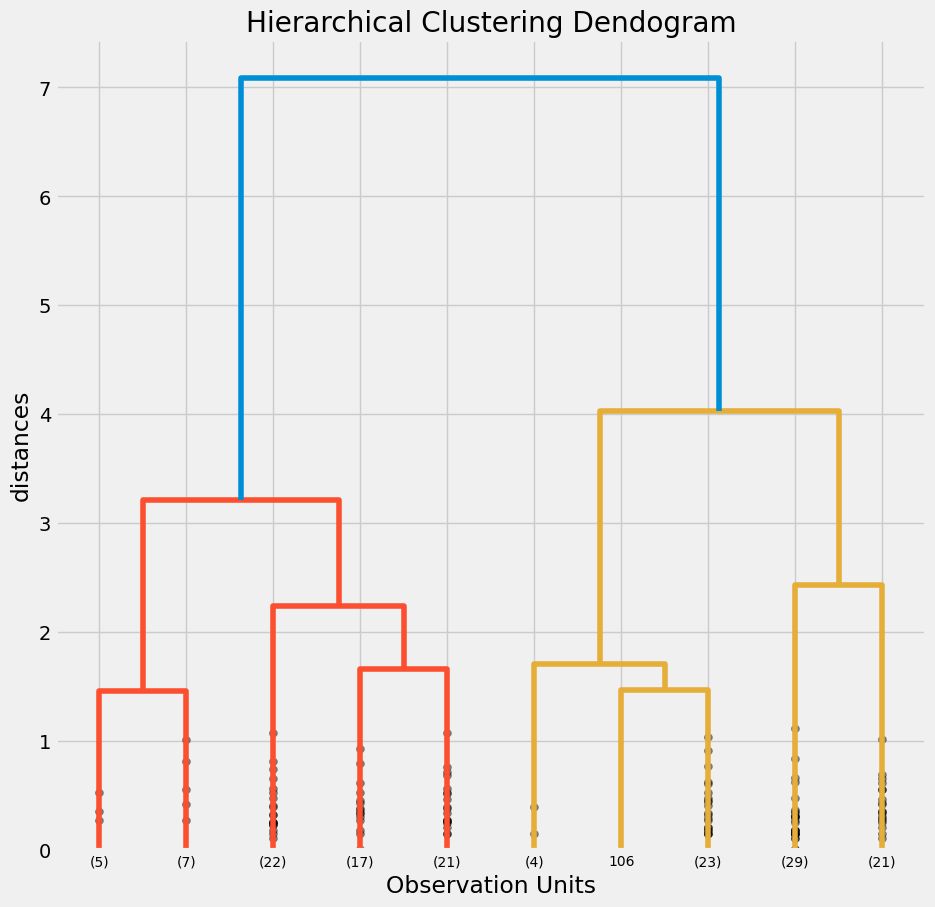

In [34]:
plt.figure(figsize=(10,10)) 
plt.title("Hierarchical Clustering Dendogram")
plt.xlabel("Observation Units")
plt.ylabel("distances")
dendrogram(linkage(x,"complete"),
          leaf_font_size=10,
          truncate_mode="lastp",
           p=10,
           show_contracted=True)
plt.show()

# Principal Component Analysis using SVM

Principal components analysis (PCA) is a dimensionality reduction approach that creates a new collection of orthogonal components from a dataset's original characteristics.The original characteristics' linear combinations make up the primary components, which are arranged in order of how much variance in the data they account for.

SVM is an effective supervised learning method that may be applied to regression and classification problems.In order to maximise the margin between classes, it locates the hyperplane in the feature space that best divides the classes.SVM is well-known for its capacity to manage complicated decision boundaries and outliers, and it is useful for high-dimensional data.

In [35]:
# Load dataset
iris_df = pd.read_csv("/kaggle/input/iris-flower-dataset/IRIS.csv")

# Separate features and target variable
X = iris_df.drop('species', axis=1)
y = iris_df['species']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)  # You can adjust the number of components as needed
X_pca = pca.fit_transform(X_scaled)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train a classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Predict on test data
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9


In [36]:
# Load the Iris dataset
iris_df = pd.read_csv("/kaggle/input/iris-flower-dataset/IRIS.csv")

# Separate features and target variable
X = iris_df.drop('species', axis=1)
y = iris_df['species']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Create a unique color for each species
color_map = {'Iris-setosa': 'blue', 'Iris-versicolor': 'green', 'Iris-virginica': 'red'}

# Create a trace for each species
traces = []
for species in iris_df['species'].unique():
    indices = iris_df['species'] == species
    trace = go.Scatter3d(
        x=X_pca[indices, 0],
        y=X_pca[indices, 1],
        z=X_pca[indices, 2],
        mode='markers',
        marker=dict(
            size=6,
            color=color_map[species],  # Assign a unique color to each species
            opacity=0.8
        ),
        name=species
    )
    traces.append(trace)

# Create layout
layout = go.Layout(
    title='PCA Visualization of Iris Dataset in 3D',
    scene=dict(
        xaxis=dict(title='Principal Component 1'),
        yaxis=dict(title='Principal Component 2'),
        zaxis=dict(title='Principal Component 3')
    )
)

# Create figure
fig = go.Figure(data=traces, layout=layout)

# Show plot
fig.show()


# Hyperparameter Tuning using GridSearchCV

Hyperparameters are algorithmic settings that are predetermined before the learning process begins and are not learnt from data. A decision tree's depth or the regularisation parameter selected for linear models are two examples. The model's performance can be greatly impacted by adjusting these hyperparameters.

By thoroughly searching through a manually defined subset of hyperparameter values, GridSearchCV is a technique for fine-tuning hyperparameters. It chooses the combination of hyperparameters that produces the highest performance based on a predetermined evaluation measure by doing cross-validation over all feasible combinations.

In [37]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf', 'poly']}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)

# Perform GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best Parameters:", grid_search.best_params_)

# Predict on test data using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1

# Feature Selection using SelectKBest

The process of choosing a subset of pertinent characteristics to be used in the creation of a model is known as feature selection. By eliminating superfluous or unnecessary characteristics, it seeks to increase interpretability, decrease overfitting, and improve model performance.

Using univariate statistical tests, the feature selection approach known as SelectKBest chooses the top k features. It chooses the k features with the greatest scores after evaluating each feature separately using a selected statistical test.

In [38]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select the top 2 features based on ANOVA F-value
selector = SelectKBest(f_classif, k=2)
X_selected = selector.fit_transform(X_scaled, y)

# Split data into train and test sets using the selected features
X_train_selected, X_test_selected, _, _ = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train a classifier using the selected features
svm_classifier_selected = SVC(kernel='linear')
svm_classifier_selected.fit(X_train_selected, y_train)

# Predict on test data
y_pred_selected = svm_classifier_selected.predict(X_test_selected)

In [39]:
import plotly.graph_objects as go
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the Iris dataset
iris_df = pd.read_csv("/kaggle/input/iris-flower-dataset/IRIS.csv")

# Separate features and target variable
X = iris_df.drop('species', axis=1)
y = iris_df['species']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform feature selection
selector = SelectKBest(f_classif, k=3)
X_selected = selector.fit_transform(X_scaled, y)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=3)
X_selected_3d = pca.fit_transform(X_selected)

# Create a unique color for each species
color_map = {'Iris-setosa': 'blue', 'Iris-versicolor': 'green', 'Iris-virginica': 'red'}

# Create traces for each species
traces = []
for species in iris_df['species'].unique():
    idx = iris_df['species'] == species
    trace = go.Scatter3d(
        x=X_selected_3d[idx, 0],
        y=X_selected_3d[idx, 1],
        z=X_selected_3d[idx, 2],
        mode='markers',
        marker=dict(
            size=6,
            color=color_map[species],  # Assign a unique color to each species
            opacity=0.8
        ),
        name=species
    )
    traces.append(trace)

# Create layout
layout = go.Layout(
    title='Feature Selection Visualization of Iris Dataset in 3D',
    scene=dict(
        xaxis=dict(title='Principal Component 1'),
        yaxis=dict(title='Principal Component 2'),
        zaxis=dict(title='Principal Component 3')
    )
)

# Create figure
fig = go.Figure(data=traces, layout=layout)

# Show plot
fig.show()

# Evaluate the classifier
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print("Accuracy with selected features:", accuracy_selected)

Accuracy with selected features: 1.0
